In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
tf.__version__

'2.13.0-rc1'

In [86]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [87]:
df = pd.read_csv('data_boston.csv', header='infer', encoding='latin1')
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [88]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [89]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

In [91]:
my_model1 = Sequential()
my_model1.add(Dense(input_dim=n_vars, units=1, activation="linear"))

In [92]:
my_model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
n_epochs = 2000
batch_size = 10
learn_rate = 0.002

In [94]:
my_optimizer=Adam(lr=learn_rate)
my_model1.compile(loss="mae", optimizer=my_optimizer, metrics=["mse"])

In [95]:
my_summary = my_model1.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           validation_split=0.2, verbose=0)

In [96]:
my_summary.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

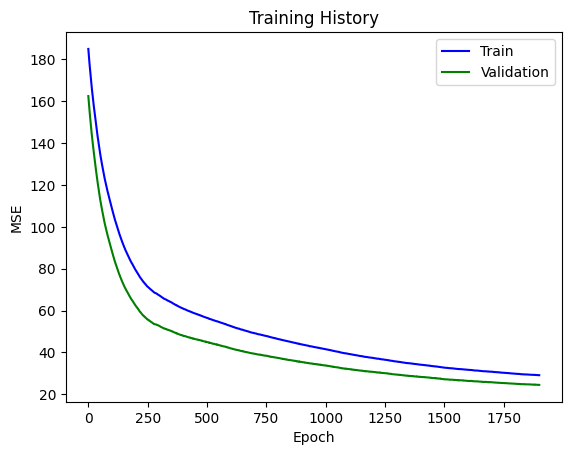

In [97]:
n_skip = 100
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [99]:
y_pred = my_model1.predict(X_test)[:, 0]
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE, 3)

5/5 [==============================] - 0s 615us/step


5.712

In [100]:
MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE, 3)))

Test RMSE : 5.712


In [101]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [102]:
my_input = Input(shape=(n_vars,))
my_output = Dense(units=1, activation='linear')(my_input)

In [103]:
my_model2 = Model(inputs=my_input, outputs=my_output)

In [104]:
my_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_10 (Dense)            (None, 1)                 14        
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
my_optimizer=Adam(lr=learn_rate)
my_model2.compile(loss="mae", optimizer=my_optimizer, metrics=["mse"])

In [106]:
my_summary = my_model2.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           validation_split=0.2, verbose=0)

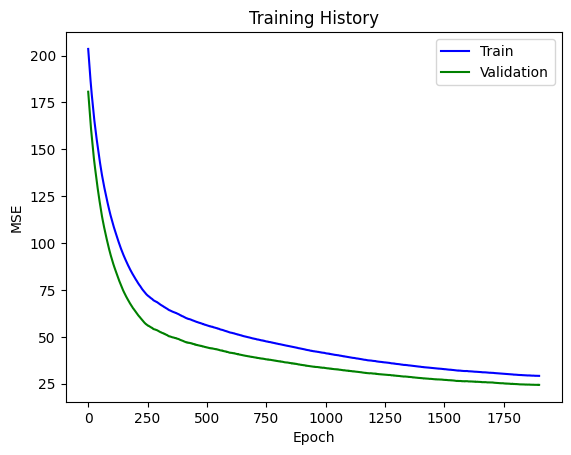

In [108]:
n_skip = 100
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [109]:
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE, 3)))

Test RMSE : 5.722


In [113]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [114]:
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1, 1)

In [117]:
import tensorflow as tf

In [119]:
y = tf.keras.utils.to_categorical(y0, num_classes=3)

In [120]:
header = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species_0', 'Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X, y], axis=1), columns=header)
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [121]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

In [123]:
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units=3, activation="softmax"))

In [124]:
my_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
n_epochs = 500
batch_size = 10
learn_rate = 0.005

In [126]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])

In [127]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           validation_split=0.2, verbose=0)

In [129]:
my_summary.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

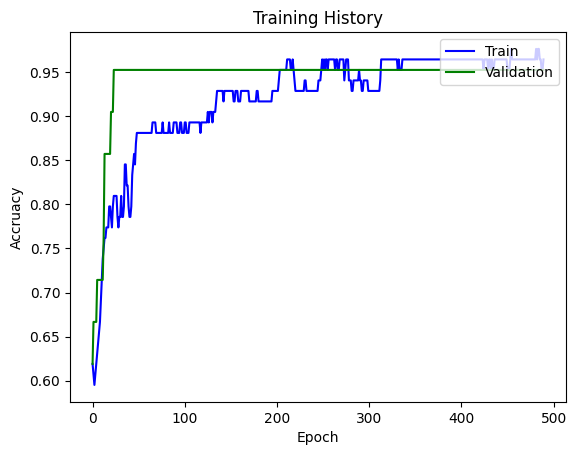

In [130]:
n_skip = 10
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [131]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.911


In [132]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [134]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


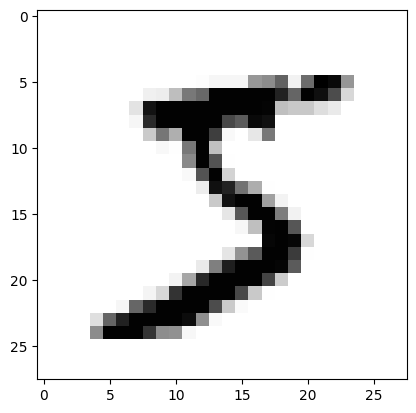

In [135]:
i_image = 0
plt.imshow(X_train[i_image, :, :], cmap="Greys")
plt.show()

In [136]:
X_train = X_train/255
X_test = X_test/255

In [137]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [138]:
y = np.concatenate([y_train, y_test], axis=0)
y = tf.keras.utils.to_categorical(y, 10)
y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

In [139]:
drop_prob = 0.5
my_model = Sequential()

my_model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Flatten())
my_model.add(Dense(units=1024, activation='relu'))

my_model.add(Dropout(rate=drop_prob))

my_model.add(Dense(units=10, activation='softmax'))

In [141]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [142]:
n_epochs = 10
batch_size = 200
learn_rate = 0.001

In [143]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])

In [144]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/10
240/240 [==============================] - 14s 59ms/step - loss: 0.2049 - accuracy: 0.9374 - val_loss: 0.0615 - val_accuracy: 0.9824
Epoch 2/10
240/240 [==============================] - 15s 61ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 3/10
240/240 [==============================] - 14s 60ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 4/10
240/240 [==============================] - 14s 59ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0280 - val_accuracy: 0.9923
Epoch 5/10
240/240 [==============================] - 14s 60ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0268 - val_accuracy: 0.9933
Epoch 6/10
240/240 [==============================] - 14s 60ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0312 - val_accuracy: 0.9912
Epoch 7/10
240/240 [==============================] - 15s 63ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0338 - val_accuracy:

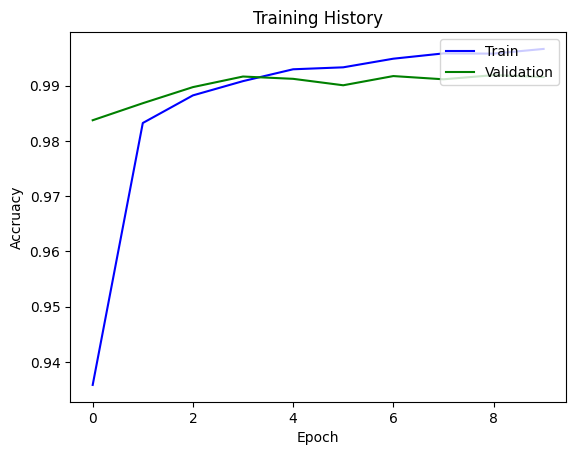

In [52]:
n_skip = 0
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [145]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.993


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [148]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [149]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


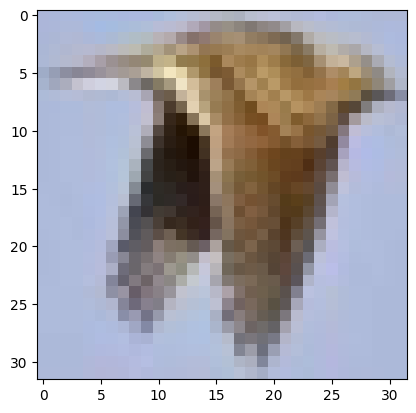

In [150]:
i_image = 123
plt.imshow(X_train[i_image, :, :])
plt.show()

In [151]:
X_train = X_train/255
X_test = X_test/255

In [152]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [153]:
y = np.concatenate([y_train, y_test], axis=0)
y = tf.keras.utils.to_categorical(y, 10)
y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

In [155]:
drop_prob = 0.7
my_model = Sequential()

my_model.add(Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=2))

my_model.add(Flatten())
my_model.add(Dense(units=1024, activation='relu'))

my_model.add(Dropout(rate=drop_prob))

my_model.add(Dense(units=10, activation='softmax'))

In [156]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [157]:
n_epochs = 20
batch_size = 20
learn_rate = 0.0001

In [158]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])

In [159]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.3, verbose=1)

Epoch 1/20
1750/1750 [==============================] - 26s 15ms/step - loss: 1.6305 - accuracy: 0.4033 - val_loss: 1.3104 - val_accuracy: 0.5308
Epoch 2/20
1750/1750 [==============================] - 27s 16ms/step - loss: 1.2847 - accuracy: 0.5405 - val_loss: 1.1356 - val_accuracy: 0.6011
Epoch 3/20
1750/1750 [==============================] - 29s 16ms/step - loss: 1.1401 - accuracy: 0.5968 - val_loss: 1.0476 - val_accuracy: 0.6314
Epoch 4/20
1750/1750 [==============================] - 30s 17ms/step - loss: 1.0417 - accuracy: 0.6339 - val_loss: 1.0230 - val_accuracy: 0.6423
Epoch 5/20
1750/1750 [==============================] - 29s 17ms/step - loss: 0.9529 - accuracy: 0.6652 - val_loss: 1.0365 - val_accuracy: 0.6455
Epoch 6/20
1750/1750 [==============================] - 30s 17ms/step - loss: 0.8880 - accuracy: 0.6882 - val_loss: 0.9493 - val_accuracy: 0.6765
Epoch 7/20
1750/1750 [==============================] - 30s 17ms/step - loss: 0.8261 - accuracy: 0.7100 - val_loss: 0.9386 -

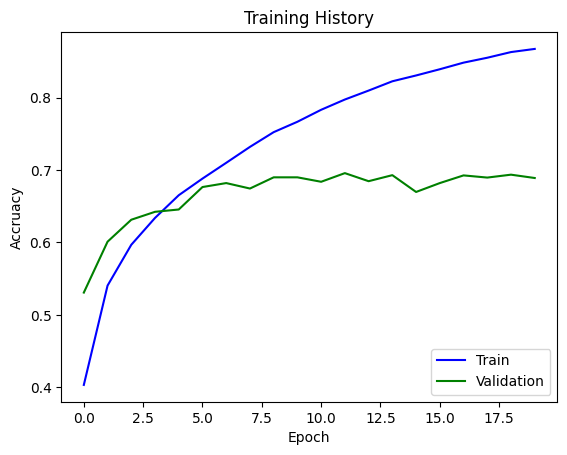

In [160]:
n_skip = 0
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [161]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.687


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [164]:
df = pd.read_csv('data_time_series.csv', header='infer', encoding='latin1')
n_times_steps = df.shape[0]
print(df.shape)

(41, 1)


In [165]:
df.head()

,Value
0,2.26483
1,3.80588
2,4.21088
3,3.48790
4,4.86365


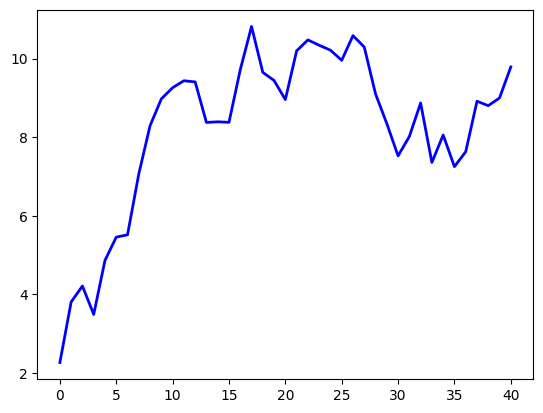

In [166]:
plt.plot(df.Value, c="b", linewidth=2, linestyle="-")
plt.show()

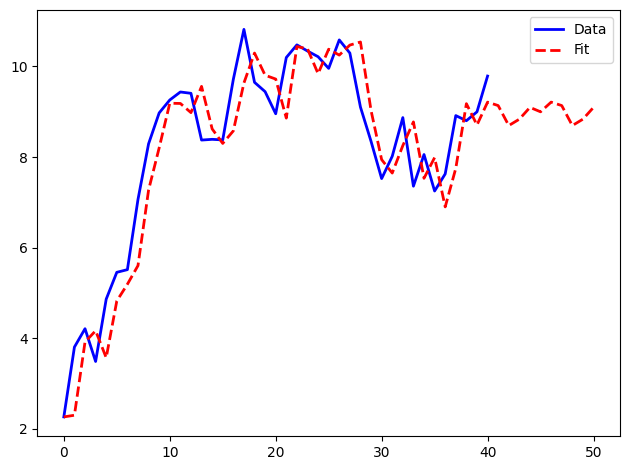

In [167]:
model = ExponentialSmoothing(df['Value'][0:40], seasonal='mul', seasonal_periods=6).fit()
pred = model.predict(start=0, end=50)
plt.plot(df, c='b', linewidth=2, linestyle='-', label='Data')
plt.plot(pred, c='r', linewidth=2, linestyle='--', label='Fit')
plt.legend()
plt.tight_layout()
plt.show()

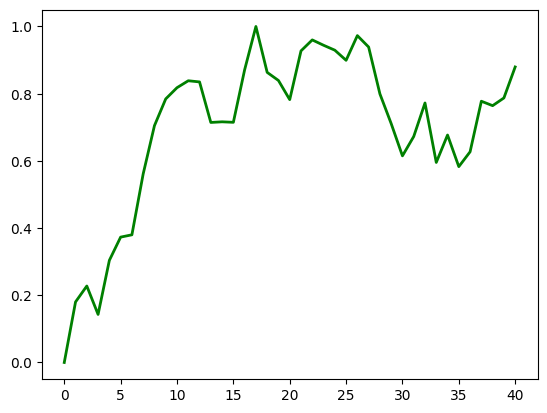

In [168]:
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)
plt.plot(ts_scaled, c="g", linewidth=2, linestyle="-")
plt.show()

In [169]:
ts_scaled_2 = ts_scaled.reshape(1, -1, 1)

In [170]:
n_epochs = 1001
batch_size = 1
learn_rate = 0.0002

In [171]:
n_input = 1
n_neurons = 100
n_output = 1

In [172]:
my_model = Sequential()
my_model.add(SimpleRNN(units=n_neurons, return_sequences=True, input_shape=(None, n_input)))

my_model.add(TimeDistributed(Dense(units=n_output, activation="linear")))

In [173]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 100)         10200     
                                                                 
 time_distributed (TimeDist  (None, None, 1)           101       
 ributed)                                                        
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [174]:
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss="mse", optimizer=my_optimizer, metrics=["mse"])

In [175]:
my_summary = my_model.fit(ts_scaled_2[:, :-1, :], ts_scaled_2[:, 1:, :], epochs=n_epochs,
                          batch_size=batch_size, verbose=0)

In [177]:
my_summary.history.keys()

dict_keys(['loss', 'mse'])

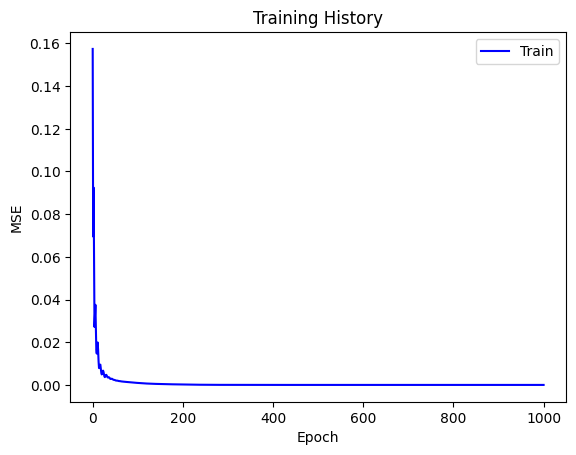

In [178]:
plt.plot(my_summary.history['mse'], c="b")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [180]:
n_ts_seed = 5
n_predict_time_steps = 55

In [181]:
ts_seed = ts_scaled[0:n_ts_seed]
for i in range(n_predict_time_steps):
    X = ts_seed.reshape(1, -1, 1)
    y_pred = my_model.predict(X, verbose=0)
    y_last = y_pred[0, -1, 0]
    ts_seed = np.concatenate((ts_seed, np.array([y_last]).reshape(1, 1)), axis=0)

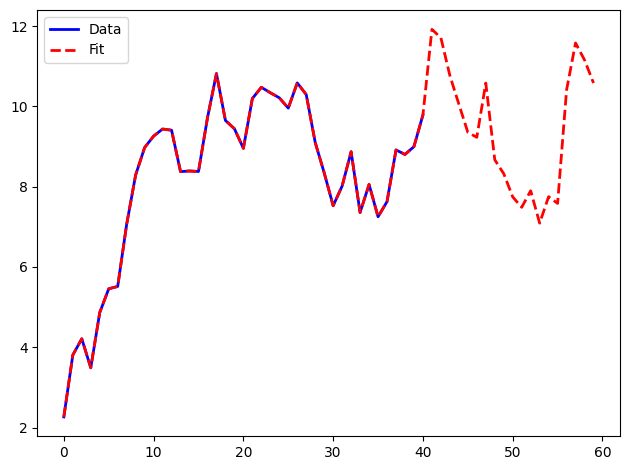

In [182]:
ts = scaler.inverse_transform(ts_seed)
plt.plot(df.Value, c='b', linewidth=2, linestyle="-", label="Data")
plt.plot(ts, c='r', linewidth=2, linestyle="--", label="Fit")
plt.legend()
plt.tight_layout()
plt.savefig("out.png")
plt.show()